In [1]:
import sys
from pathlib import Path
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root / 'src'))

In [ ]:
from riskmc.data import load_prices
from riskmc.returns import log_returns
from riskmc.simulation import mc_gaussian_returns
from riskmc.risk_metrics import var, cvar
from riskmc.plots import plot_pnl_distribution
from riskmc.data import create_data


In [3]:
assets = ['SPY', 'TLT', 'GLD', 'QQQ']
weights = [0.4, 0.3, 0.2, 0.1]
#weights chosen like this as
#equities (eg SPY) dominate risk
#bonds (eg TLT) as ballast
#gold (GLD) as hedge
#QQQ as growth tilt

N_SIMS = 100_000
HORIZON = 1

In [4]:
import numpy as np

In [ ]:
project_root = Path('..').resolve()
data_out_path = project_root / 'data' / 'prices.csv'
create_data(data_out_path)


Saved 42 rows to /Users/ankithrangan/Desktop/Portfolio-risk-monte-carlo/data/prices.csv


Ticker,SPY,TLT,GLD,QQQ
Date,,,,
2026-01-12,695.159973,87.669998,422.230011,627.169983
2026-01-13,693.770020,87.820000,421.630005,626.239990
2026-01-14,690.359985,88.330002,425.940002,619.549988
2026-01-15,692.239990,88.309998,423.329987,621.780029
2026-01-16,691.659973,87.800003,421.290009,621.260010


In [7]:
prices = load_prices(data_out_path)
rets = log_returns(prices)

print(rets)

                 SPY       TLT       GLD       QQQ
Date                                              
2025-11-18 -0.008433 -0.000337  0.007239 -0.012250
2025-11-19  0.003856 -0.002023  0.001628  0.005952
2025-11-20 -0.015360  0.003930 -0.000293 -0.023957
2025-11-21  0.009912  0.003021 -0.001549  0.007485
2025-11-24  0.014611  0.005682  0.015720  0.025252
2025-11-25  0.009362  0.002552 -0.000316  0.006145
2025-11-26  0.006880  0.004423  0.007967  0.008797
2025-11-28  0.005444 -0.004755  0.012348  0.008074
2025-12-01 -0.004576 -0.012527  0.004809 -0.003365
2025-12-02  0.001850  0.000450 -0.006461  0.007796
2025-12-03  0.003457  0.002811 -0.000930  0.002441
2025-12-04  0.000731 -0.005404  0.000646 -0.000931
2025-12-05  0.001898 -0.004639 -0.001784  0.004069
2025-12-08 -0.003009 -0.003295 -0.002643 -0.001920
2025-12-09 -0.000863  0.001024  0.005124  0.001233
2025-12-10  0.006610  0.003857  0.004250  0.004087
2025-12-11  0.002324 -0.001360  0.010712 -0.003240
2025-12-12 -0.010810 -0.009685 

In [24]:
#use this if dataset is made larger, could be more accurate
#for now, dataset too small so use [0.4, 0.3, 0.2, 0.1]
'''
vols = rets.std()
inv_vol = 1/vols
weights = inv_vol / inv_vol
weights
'''

'\nvols = rets.std()\ninv_vol = 1/vols\nweights = inv_vol / inv_vol\nweights\n'

In [25]:
print(prices)
print(rets)

               SPY    TLT     GLD     QQQ
Date                                     
2026-01-14  690.36  88.33  422.13  630.00
2026-01-13  691.66  88.32  421.84  632.10
2026-01-12  692.24  88.30  423.50  631.55
2026-01-09  687.72  88.10  420.90  625.40
2026-01-08  685.81  87.90  419.75  622.80
2026-01-07  688.50  88.05  421.30  626.20
2026-01-06  689.72  87.80  420.18  624.95
2025-12-31  681.92  88.99  399.02  615.22
                 SPY       TLT       GLD       QQQ
Date                                              
2026-01-13  0.001881 -0.000113 -0.000687  0.003328
2026-01-12  0.000838 -0.000226  0.003927 -0.000870
2026-01-09 -0.006551 -0.002268 -0.006158 -0.009786
2026-01-08 -0.002781 -0.002273 -0.002736 -0.004166
2026-01-07  0.003915  0.001705  0.003686  0.005444
2026-01-06  0.001770 -0.002843 -0.002662 -0.001998
2025-12-31 -0.011373  0.013463 -0.051672 -0.015692


In [26]:
portfolio_returns = rets @ weights
print(portfolio_returns)

Date
2026-01-13    0.000914
2026-01-12    0.000966
2026-01-09   -0.005511
2026-01-08   -0.002758
2026-01-07    0.003359
2026-01-06   -0.000877
2025-12-31   -0.012414
dtype: float64


In [9]:
#monte carlo sim
sim_asset_returns = mc_gaussian_returns(rets, N_SIMS, HORIZON)
sim_port_returns = sim_asset_returns @ weights

print(sim_asset_returns)
print(sim_port_returns)

[[ 0.00176838 -0.00179718 -0.00707686  0.00616312]
 [ 0.01571163  0.00305161  0.01002562  0.02190209]
 [ 0.00302421 -0.00241154 -0.00310445  0.00724842]
 ...
 [ 0.00653659  0.00243904  0.00053676  0.00879952]
 [ 0.0045527   0.00456613  0.02092314  0.00229671]
 [-0.01432736 -0.00347885  0.01245735 -0.01785437]]
[-0.00063086  0.01139547  0.00059017 ...  0.00433365  0.00760522
 -0.00606857]


In [10]:
#risk metrics
var_95 = var(sim_port_returns, 0.95)
var_99 = var(sim_port_returns, 0.99)
cvar_99 = cvar(sim_port_returns, 0.99)

var_95, var_99, cvar_99

(np.float64(0.007106574317412765),
 np.float64(0.010378069191546099),
 np.float64(0.012139580784519084))

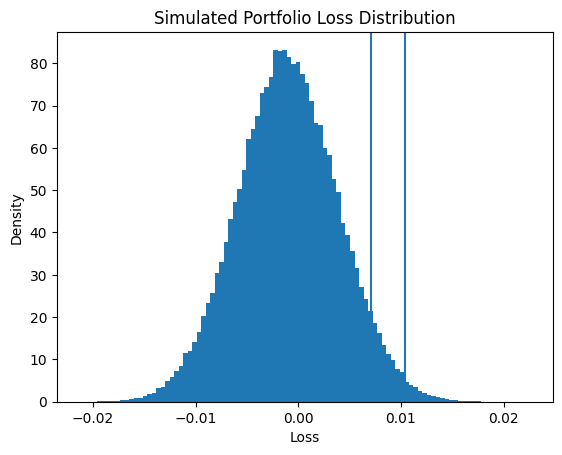

In [11]:
plot_pnl_distribution(sim_port_returns, var_95, var_99)